In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import hdbscan
import os
import sys

sys.path.append("/Users/leo/Programming/PLR/Leo/main/final/grid_results")
from utils import parse_result_line, drop_correlated_features, drop_skewed_features, aggregate_columns, plot_cluster_averages, plot_solution_correlations
from aencoder import Autoencoder, train_autoencoder
from top_results import sorted_results

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d

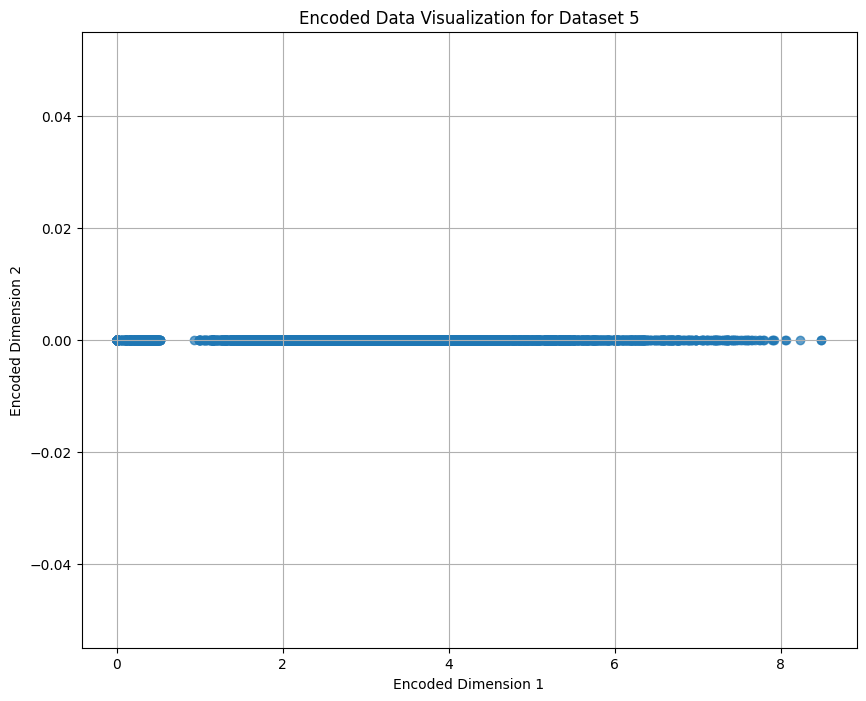

In [2]:
import pandas as pd
import numpy as np
import torch
from aencoder import Autoencoder, train_autoencoder
import matplotlib.pyplot as plt
import os

# Assuming utils.py and aencoder.py are in the same directory as this script
# and contain necessary definitions like drop_correlated_features, drop_skewed_features, etc.

# Load the parameters from sorted_results
from top_results import sorted_results

def process_data(result):
    # Load dataset
    dataset_path = f"/Users/leo/Programming/PLR/Leo/data/dataset_{result['dataset']}.csv"
    data = pd.read_csv(dataset_path).drop(columns=["Unnamed: 0"])

    # Preprocess data
    data_unskewed = drop_skewed_features(data, result['skew_threshold'])
    data_drop_corr = drop_correlated_features(data_unskewed, result['corr_threshold'])

    # Convert data to PyTorch tensors
    tensor_data = torch.tensor(data_drop_corr.values, dtype=torch.float32)

    # Initialize and train Autoencoder
    autoencoder_model = Autoencoder(input_size=tensor_data.shape[1], hidden_size=result['hidden_size'], latent_dim=result['latent_dim'])
    trained_model = train_autoencoder(autoencoder_model, tensor_data, result['learning_rate'], result['epochs'])

    # Apply Autoencoder
    data_encoded = trained_model.encoder(tensor_data).detach().numpy()

    # Visualization of the encoded data
    plt.figure(figsize=(10, 8))
    plt.scatter(data_encoded[:, 0], data_encoded[:, 1], alpha=0.7)
    plt.title(f'Encoded Data Visualization for Dataset {result["dataset"]}')
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.grid(True)
    plt.show()

if len(sorted_results) > 5:
    result = sorted_results[5] # 6th element (indexing starts from 0)
    process_data(result)
else:   
    print("The sorted_results list does not have a 6th element.")
